In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def get_df_numerical(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    return df.select_dtypes(include=numerics)



def plot_correlation_map( df , title ,annot=True):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = annot, 
        annot_kws = { 'fontsize' : 12 }
    )
    
    plt.title(title, fontsize=24)



# Load the data

In [3]:
data = pd.read_pickle("../data/final_sets/model/2016")

In [4]:
data.head()

,gender,entered,efficiency,eig_central,in_degree,k_core,out_degree,views,age,is_alive,distance_birth,distance_death,distance_delta,nationality_num,party_num,occupation_num,year_interval
0,male,2007,0.760000,0.000046,2,4,3,916.0,0,no,-1,27,-28,1,0,1,2
1,male,2005,0.899654,0.000801,9,10,8,4100.0,70,yes,70,-1,71,1,1,1,1
2,male,2013,0.734694,0.000040,2,7,5,1651.0,62,no,78,16,62,1,1,1,3
3,male,2007,1.000000,0.000007,2,5,4,6671.0,88,yes,88,-1,89,0,0,1,2
4,male,2007,0.814815,0.000068,4,4,5,7825.0,84,no,109,25,84,1,1,1,2


# Filter for columns with numerical values

In [5]:
n_data = get_df_numerical(data)

In [6]:
n_data.head()

,entered,efficiency,eig_central,in_degree,k_core,out_degree,views,age,distance_birth,distance_death,distance_delta,nationality_num,party_num,occupation_num
0,2007,0.760000,0.000046,2,4,3,916.0,0,-1,27,-28,1,0,1
1,2005,0.899654,0.000801,9,10,8,4100.0,70,70,-1,71,1,1,1
2,2013,0.734694,0.000040,2,7,5,1651.0,62,78,16,62,1,1,1
3,2007,1.000000,0.000007,2,5,4,6671.0,88,88,-1,89,0,0,1
4,2007,0.814815,0.000068,4,4,5,7825.0,84,109,25,84,1,1,1


# Correlations

In [7]:
n_data.corr()

,entered,efficiency,eig_central,in_degree,k_core,out_degree,views,age,distance_birth,distance_death,distance_delta,nationality_num,party_num,occupation_num
entered,1.000000,0.117528,-0.168066,-0.275806,-0.460971,-0.374662,-0.077665,-0.224056,-0.196538,-0.091967,-0.114298,-0.108699,-0.125448,-0.038292
efficiency,0.117528,1.000000,0.003332,0.003857,-0.216727,-0.143186,0.012421,0.009594,0.011400,-0.008514,0.021975,-0.061847,-0.036488,-0.012845
eig_central,-0.168066,0.003332,1.000000,0.787042,0.432957,0.425349,0.462168,0.066610,0.041443,0.006887,0.037958,0.064805,0.089499,0.037977
in_degree,-0.275806,0.003857,0.787042,1.000000,0.649606,0.629804,0.408874,0.103899,0.094513,0.059184,0.038390,0.071616,0.160514,0.037017
k_core,-0.460971,-0.216727,0.432957,0.649606,1.000000,0.914934,0.197929,0.175157,0.128190,0.082447,0.049659,0.105564,0.275007,0.049219
out_degree,-0.374662,-0.143186,0.425349,0.629804,0.914934,1.000000,0.191313,0.150050,0.108806,0.062843,0.050058,0.106523,0.252414,0.061245
views,-0.077665,0.012421,0.462168,0.408874,0.197929,0.191313,1.000000,0.023978,0.015877,0.006546,0.010212,0.029451,0.050169,0.040181
age,-0.224056,0.009594,0.066610,0.103899,0.175157,0.150050,0.023978,1.000000,0.611529,0.072539,0.592345,0.100668,0.205713,0.092087
distance_birth,-0.196538,0.011400,0.041443,0.094513,0.128190,0.108806,0.015877,0.611529,1.000000,0.589847,0.446463,0.065240,0.016493,0.086732
distance_death,-0.091967,-0.008514,0.006887,0.059184,0.082447,0.062843,0.006546,0.072539,0.589847,1.000000,-0.459221,-0.002600,-0.113695,0.035608


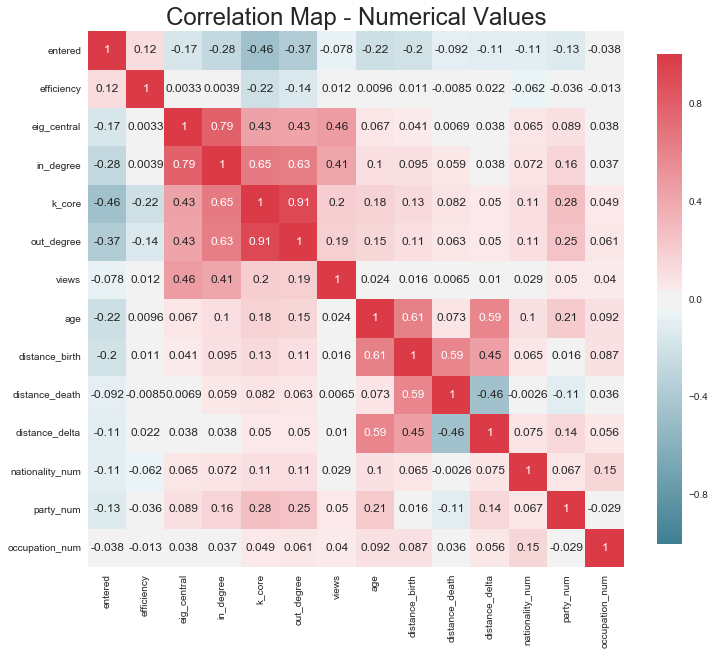

In [8]:
plot_correlation_map(n_data,"Correlation Map - Numerical Values")

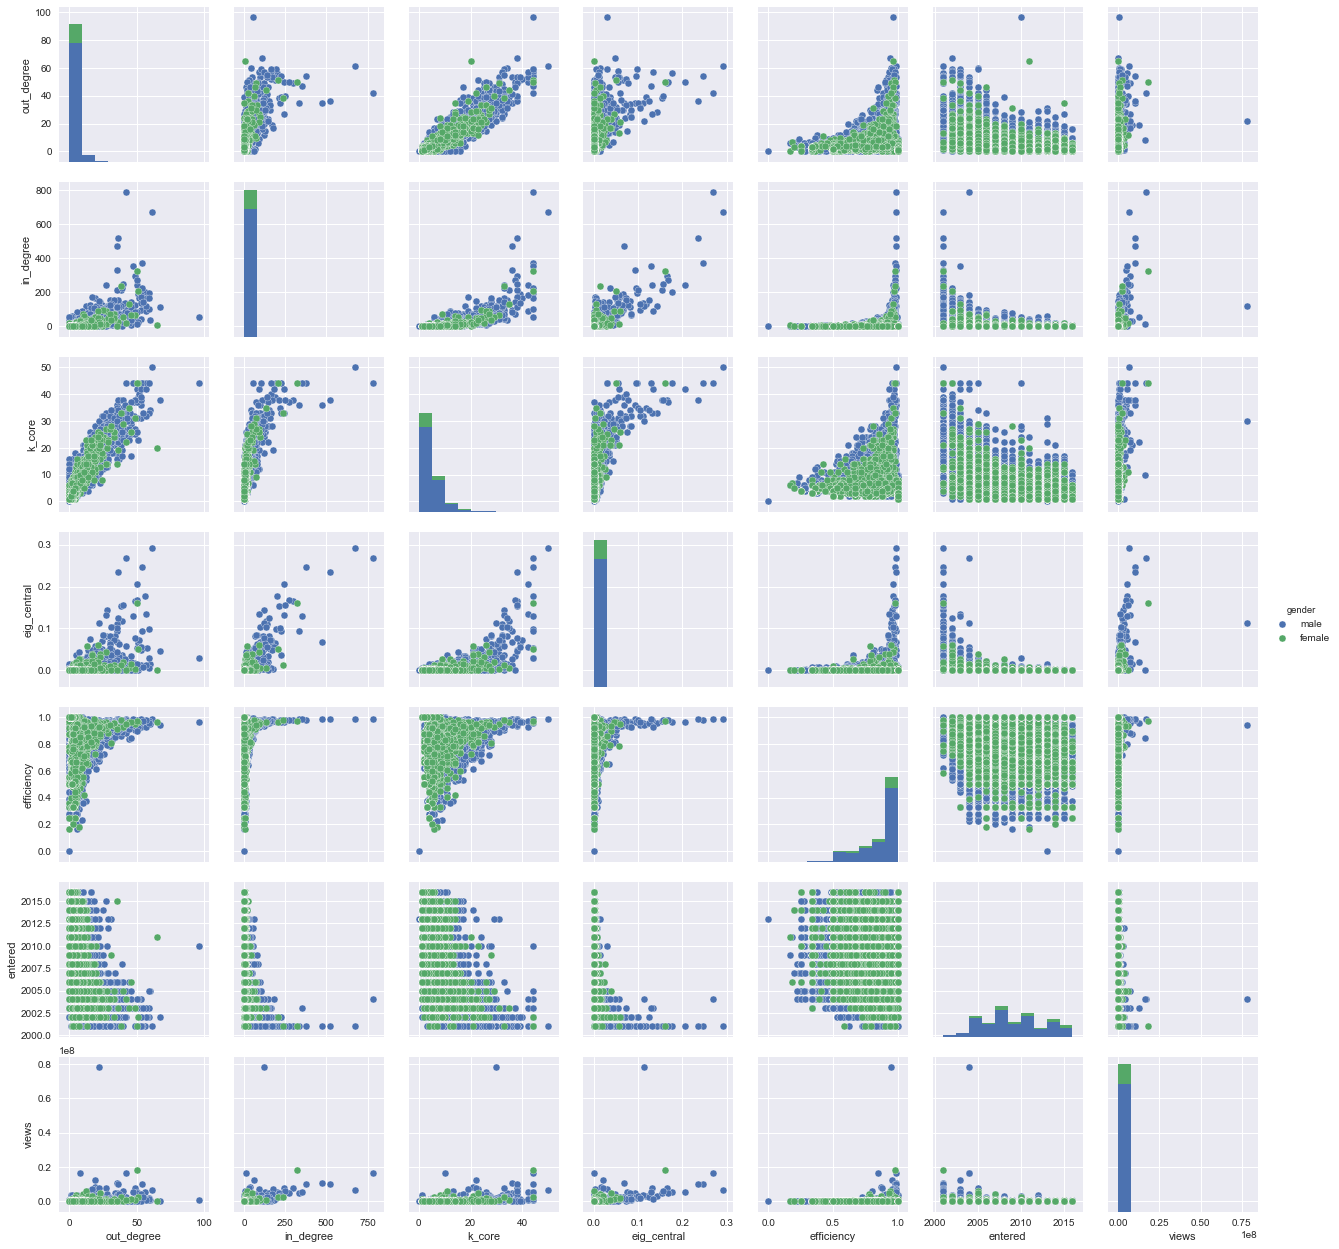

In [9]:
sns.pairplot(data[["out_degree", "in_degree", "k_core","eig_central","efficiency","entered", "views", "gender"]],hue="gender")

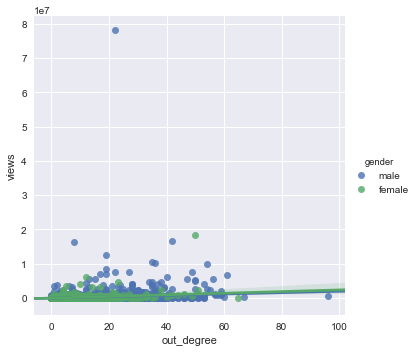

In [10]:
sns.lmplot("out_degree", "views", data, hue="gender")

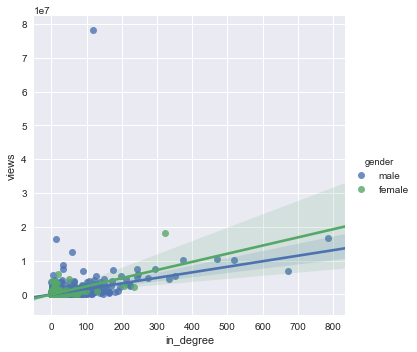

In [11]:
sns.lmplot("in_degree", "views", data, hue="gender")

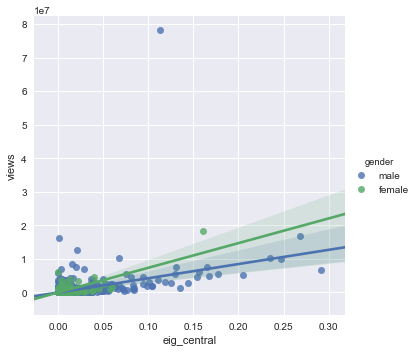

In [12]:
sns.lmplot("eig_central", "views", data, hue="gender")

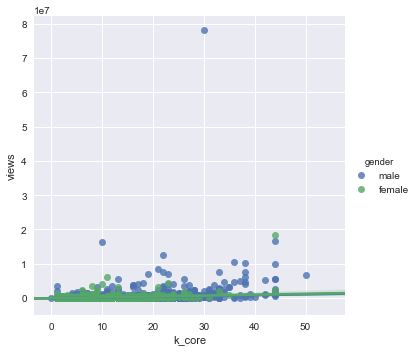

In [13]:
sns.lmplot("k_core", "views", data, hue="gender")

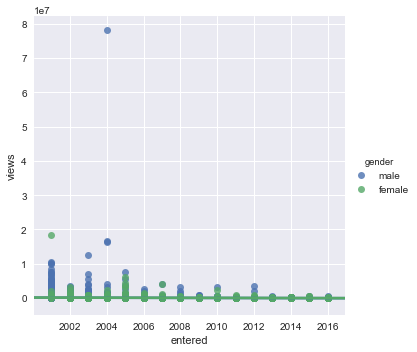

In [14]:
sns.lmplot("entered", "views", data, hue="gender")

# Univariate Analysis

In [15]:
data.describe()

,entered,efficiency,eig_central,in_degree,k_core,out_degree,views,age,distance_birth,distance_death,distance_delta,nationality_num,party_num,occupation_num
count,45286.000000,45286.000000,4.528600e+04,45286.000000,45286.000000,45286.00000,4.528600e+04,45286.000000,45286.000000,45286.000000,45286.000000,45286.000000,45286.000000,45286.000000
mean,2009.092898,0.874764,5.086958e-04,3.435830,4.360133,3.43583,2.768659e+04,49.008943,71.726737,25.132337,46.594400,0.699819,0.641942,1.415051
std,3.558152,0.161999,4.671573e-03,10.989717,4.185327,4.52381,4.443851e+05,32.032869,68.501291,69.001023,62.270007,0.569811,0.725338,0.947824
min,2001.000000,0.000000,-1.779204e-18,0.000000,0.000000,0.00000,3.040000e+02,-1.000000,-1.000000,-1.000000,-1398.000000,0.000000,0.000000,1.000000
25%,2006.000000,0.777778,6.798322e-20,1.000000,2.000000,1.00000,1.437000e+03,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000
50%,2009.000000,0.953125,3.443267e-08,1.000000,3.000000,2.00000,2.846000e+03,60.000000,66.000000,-1.000000,62.000000,1.000000,1.000000,1.000000
75%,2012.000000,1.000000,3.327005e-05,3.000000,6.000000,4.00000,7.567750e+03,73.000000,98.000000,24.000000,75.000000,1.000000,1.000000,1.000000
max,2016.000000,1.000000,2.914469e-01,785.000000,55.000000,96.00000,7.823741e+07,109.000000,1477.000000,1414.000000,1060.000000,6.000000,8.000000,23.000000


# Entered

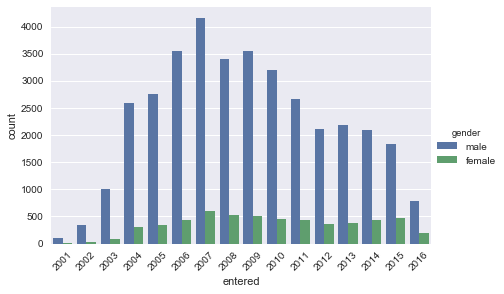

In [85]:
g = sns.factorplot("entered", data=data, hue="gender", aspect=1.5, kind="count")
g.set_xticklabels(rotation=45)

# Nationality Count

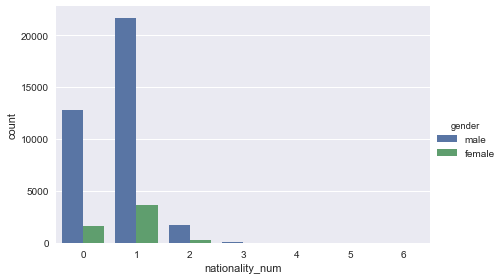

In [86]:
g = sns.factorplot("nationality_num", data=data, hue="gender", aspect=1.5, kind="count")
# g.set_xticklabels(rotation=45)

# Occupation Count

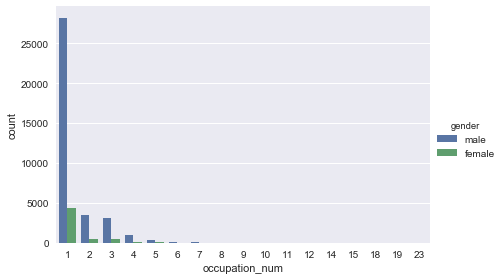

In [88]:
g = sns.factorplot("occupation_num", data=data, hue="gender", aspect=1.5, kind="count")

# Party count

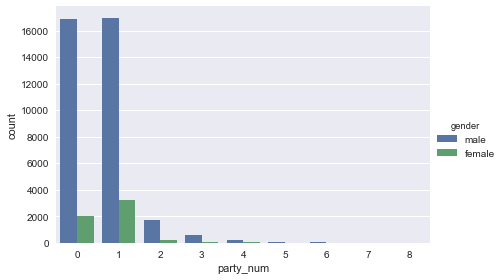

In [89]:
g = sns.factorplot("party_num", data=data, hue="gender", aspect=1.5, kind="count")

# Age

C:\Users\vujovisn\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


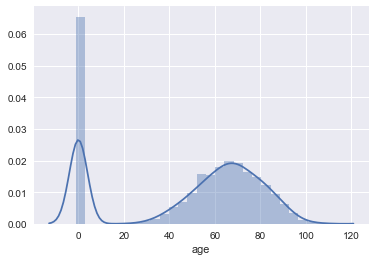

In [80]:
sns.distplot(data["age"])

# Degree Centrality

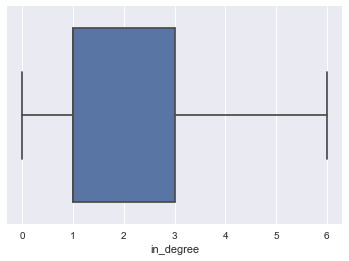

In [28]:
sns.boxplot(data["in_degree"],showfliers=False)

In [56]:
# ax = sns.distplot(data["in_degree"],hist_kws={'log':True}, hist=False)
# # ax.set_yscale('log')
# ax.set_xscale("log")

# Eigenvector Centrality

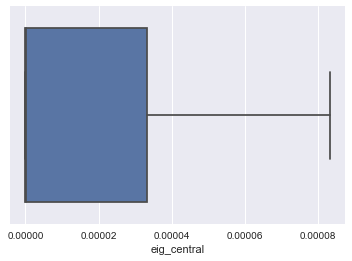

In [29]:
sns.boxplot(data["eig_central"],showfliers=False)

# Page views

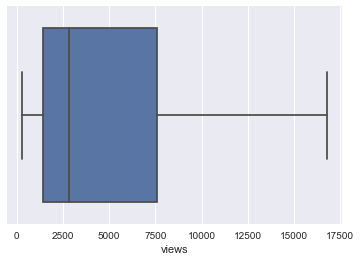

In [57]:
sns.boxplot(data["views"],showfliers=False)

In [59]:
# ax = sns.distplot(data["views"],hist_kws={'log':True}, hist=False)


In [55]:
# ax = sns.distplot(data["eig_central"],hist_kws={'log':True}, hist=False)
# ax.set_xscale("log")
# # ax.set_yscale("log")
# ax.set_ylabel("something")

In [17]:
# notebook with network, show if it is connected

# Added Article Length

In [18]:
al = pd.read_csv("../data/article_length/length_2018.csv")
al = al.drop(al.columns[0], axis=1)
al.columns = ["ID", "article_length"]
df = pd.read_pickle("../data/final_sets/base/2016")

In [19]:
df.head()

,#DBpURL,ID,WikiURL,birthDate,deathDate,gender,name,nationality,occupation,party,entered,efficiency,eig_central,in_degree,k_core,out_degree,name_u,views
0,http://dbpedia.org/resource/Nizamettin_Erkmen,144,http://en.wikipedia.org/wiki/Nizamettin_Erkmen,None,1990-10-24 00:00:00,male,[ erkmen nizamettin ],[turkish],[politician],[],2007,0.760000,0.000046,2,4,3,Nizamettin_Erkmen,916.0
1,http://dbpedia.org/resource/Claudio_Scajola,183,http://en.wikipedia.org/wiki/Claudio_Scajola,1948-01-15 00:00:00,None,male,[ claudio scajola ],[italian],[politician],[forza italia (2013)],2005,0.899654,0.000801,9,10,8,Claudio_Scajola,4100.0
2,http://dbpedia.org/resource/Thomas_Clausen_(Lo...,246,http://en.wikipedia.org/wiki/Thomas_Clausen_(L...,1939-12-22 00:00:00,2002-02-20 00:00:00,male,"[ thomas greenwood clausen , clausen thomas g...",[american],[politician],[democratic party (united states)],2013,0.734694,0.000040,2,7,5,Thomas_Clausen_(Louisiana),1651.0
3,http://dbpedia.org/resource/Yang_Ti-liang,248,http://en.wikipedia.org/wiki/Yang_Ti-liang,1929-06-30 00:00:00,None,male,[ ti-liang yang ],[],[politician],[],2007,1.000000,0.000007,2,5,4,Yang_Ti-liang,6671.0
4,http://dbpedia.org/resource/Mohammad_Natsir,259,http://en.wikipedia.org/wiki/Mohammad_Natsir,1908-07-17 00:00:00,1993-03-14 00:00:00,male,"[ mohammad natsir , natsir mohammad ]",[indonesian],[politician],[masyumi party],2007,0.814815,0.000068,4,4,5,Mohammad_Natsir,7825.0


In [20]:
df = df.merge(al, on="ID")

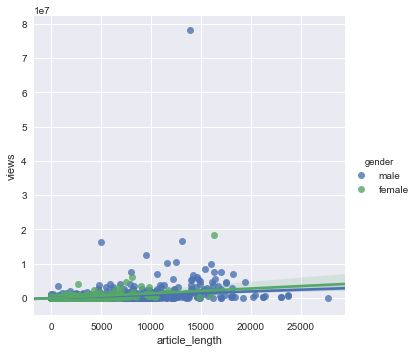

In [25]:
sns.lmplot("article_length","views", df,hue='gender')

In [22]:
df[["article_length","views"]].corr()

,article_length,views
article_length,1.000000,0.286069
views,0.286069,1.000000
